# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import warnings
warnings.filterwarnings("ignore")


# **Data Preparation**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Capstone Project/data/EURUSD60.csv', sep='\t')

In [ ]:
df

,2008-09-12 10:00,1.40932,1.41174,1.40831,1.40932.1,40366
0,2008-09-12 11:00,1.40930,1.41078,1.40402,1.40742,41207
1,2008-09-12 12:00,1.40748,1.41214,1.40500,1.41201,64393
2,2008-09-12 13:00,1.41203,1.41436,1.40895,1.40951,62232
3,2008-09-12 14:00,1.40944,1.41930,1.40836,1.41748,62494
4,2008-09-12 15:00,1.41719,1.42016,1.41626,1.41705,56890
...,...,...,...,...,...,...
99994,2024-09-20 16:00,1.11588,1.11757,1.11588,1.11738,26458
99995,2024-09-20 17:00,1.11736,1.11742,1.11582,1.11593,14024
99996,2024-09-20 18:00,1.11594,1.11660,1.11571,1.11650,12649
99997,2024-09-20 19:00,1.11650,1.11659,1.11616,1.11620,10273


In [ ]:
new_col = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
df.columns = new_col
df

,Time,Open,High,Low,Close,Volume
0,2008-09-12 11:00,1.40930,1.41078,1.40402,1.40742,41207
1,2008-09-12 12:00,1.40748,1.41214,1.40500,1.41201,64393
2,2008-09-12 13:00,1.41203,1.41436,1.40895,1.40951,62232
3,2008-09-12 14:00,1.40944,1.41930,1.40836,1.41748,62494
4,2008-09-12 15:00,1.41719,1.42016,1.41626,1.41705,56890
...,...,...,...,...,...,...
99994,2024-09-20 16:00,1.11588,1.11757,1.11588,1.11738,26458
99995,2024-09-20 17:00,1.11736,1.11742,1.11582,1.11593,14024
99996,2024-09-20 18:00,1.11594,1.11660,1.11571,1.11650,12649
99997,2024-09-20 19:00,1.11650,1.11659,1.11616,1.11620,10273


In [ ]:
data = df['Close'].values
data = data.reshape(-1, 1)

**Normalize data**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

**Prepare training and testing data (80% train, 20% test)**

In [ ]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


**Create sequences for the LSTM**

In [ ]:
def create_sequences(data, time_steps):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(x), np.array(y)

In [ ]:
time_steps = 60
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)


**Reshape input to be [samples, time steps, features]**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], time_steps, 1)
X_test = X_test.reshape(X_test.shape[0], time_steps, 1)


# **Build LSTM model**

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))


**Compile the model**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


**Train the model**

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=10)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0043
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 3.4871e-04
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 3.3354e-04
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 3.2883e-04
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 3.1475e-04
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 3.1673e-04
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 3.2647e-04
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 3.1081e-04
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 3.1458e-04
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 3.0691e-04


**Make predictions**

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


# **Visualize the predictions vs actual values**

In [ ]:
train = df[:train_size]
valid = df[train_size + time_steps:]
valid['Predictions'] = predictions

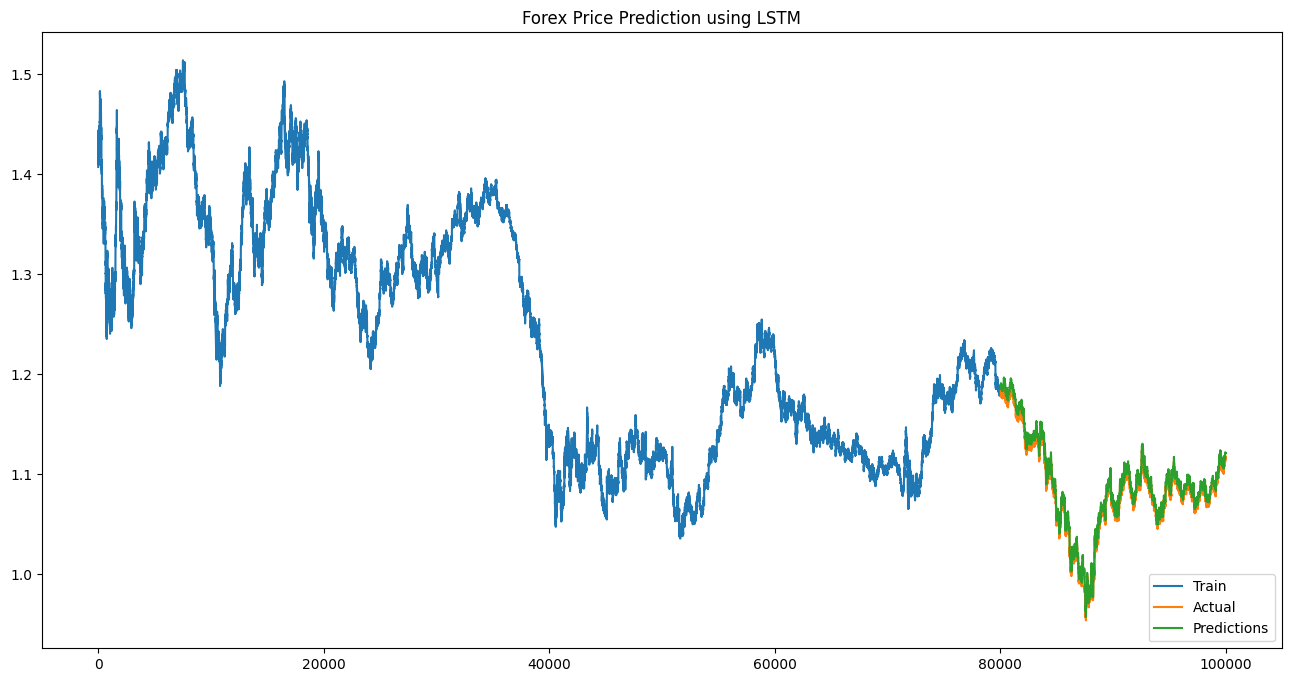

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Forex Price Prediction using LSTM')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

# **Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error
mae = mean_absolute_error(y_test_scaled, predictions)

# Mean Squared Error
mse = mean_squared_error(y_test_scaled, predictions)

# Root Mean Squared Error
rmse = np.sqrt(mse)

# R-squared
r2 = r2_score(y_test_scaled, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.004510733869748705
Mean Squared Error (MSE): 2.3549776504561234e-05
Root Mean Squared Error (RMSE): 0.004852811196055461
R-squared (R²): 0.988744723083886


In [ ]:
# Get the last sequence from the test data
last_sequence = test_data[-time_steps:].reshape(1, time_steps, 1)

# Predict the next Forex price
next_prediction_scaled = model.predict(last_sequence)

# Inverse transform the prediction to get the actual price
next_prediction = scaler.inverse_transform(next_prediction_scaled)

print(f"Next predicted Forex price: {next_prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Next predicted Forex price: 1.1214126348495483


In [ ]:
def predict_next_steps(model, last_sequence, scaler, num_predictions=5):
    next_predictions = []
    current_sequence = last_sequence

    for _ in range(num_predictions):
        next_prediction_scaled = model.predict(current_sequence)
        next_prediction = scaler.inverse_transform(next_prediction_scaled)
        next_predictions.append(next_prediction[0][0])
        current_sequence = np.append(current_sequence[:, 1:, :], [next_prediction_scaled], axis=1)

    return next_predictions


future_predictions = predict_next_steps(model, last_sequence, scaler, num_predictions=5)

print("Next 5 predicted Forex prices:", future_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Next 5 predicted Forex prices: [1.1214126, 1.1221886, 1.1234218, 1.1249094, 1.1265088]


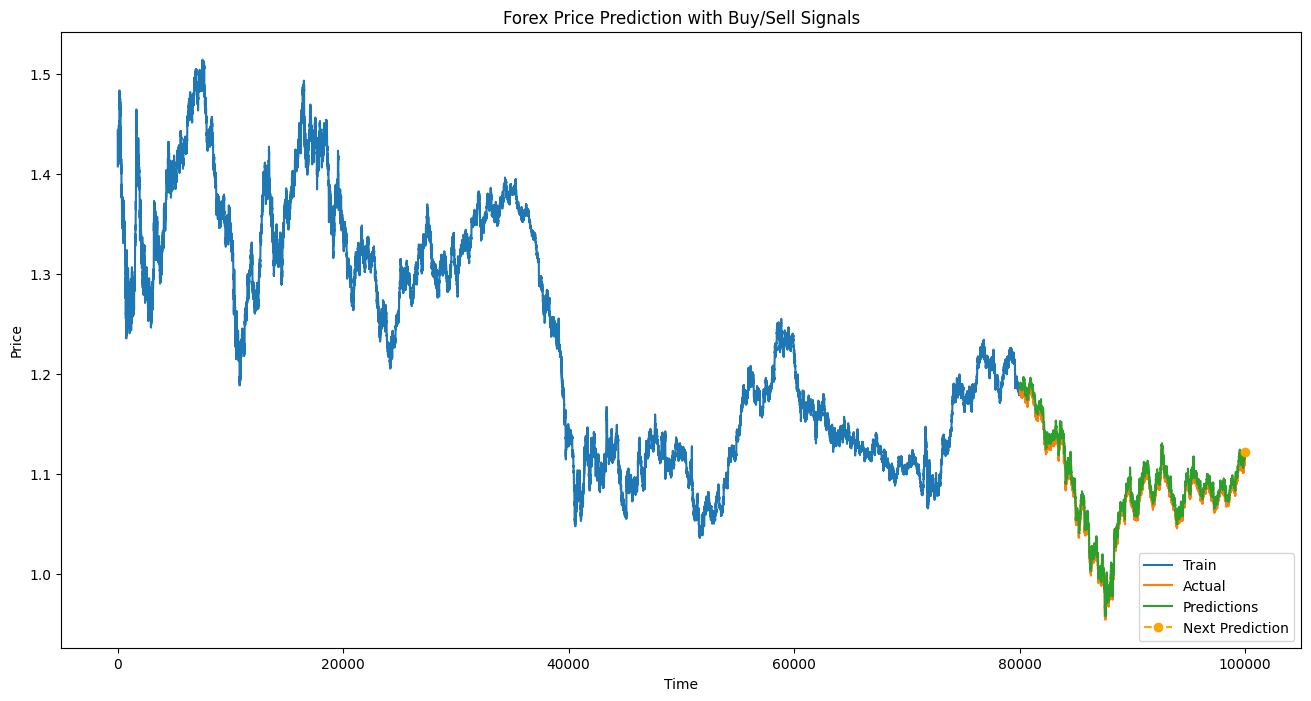

In [ ]:

new_row = pd.DataFrame({
    'Close': [None],
    'Predictions': [None],
    'Next Prediction': [next_prediction[0][0]]
}, index=[valid.index[-1] + 1])


valid = pd.concat([valid, new_row])


plt.figure(figsize=(16, 8))
plt.title('Forex Price Prediction with Buy/Sell Signals')
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Actual')
plt.plot(valid['Predictions'], label='Predictions')
plt.plot(valid['Next Prediction'], label='Next Prediction', linestyle='--', marker='o', color='orange')


plt.legend(loc='lower right')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [ ]:
# Example: Buy if predicted price is higher than current price, sell otherwise
signals = []
for i in range(len(predictions) - 1):
    if predictions[i + 1] > predictions[i]:
        signals.append(1)  # Buy
    else:
        signals.append(-1)  # Sell
signals.append(0)  # Last signal


In [ ]:
predictions = model.predict(X_test)
y_open_pred = predictions[:, 0]  # Predicted open prices
y_close_pred = predictions[:, 1]  # Predicted close prices

# Evaluate performance
rmse_open = np.sqrt(mean_squared_error(y_open_test, y_open_pred))
rmse_close = np.sqrt(mean_squared_error(y_close_test, y_close_pred))
print(f'RMSE Open: {rmse_open}, RMSE Close: {rmse_close}')

624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
predictions = model.predict(X_test)
y_pred = predictions[:, 0]  # Predicted prices (assuming only one output)

# If you have separate y_open_test and y_close_test,
# you might need to adjust how you evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
RMSE: 0.008661097180358178


In [ ]:
# Calculate prediction errors
open_errors = y_open_test - y_open_pred
close_errors = y_close_test - y_close_pred

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(open_errors, label='Open Price Errors', color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Open Price Prediction Errors')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(close_errors, label='Close Price Errors', color='brown')
plt.axhline(0, color='red', linestyle='--')
plt.title('Close Price Prediction Errors')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


NameError: name 'y_open_test' is not defined

In [ ]:
# Assuming X and y are your features and target variables
# and you're using scikit-learn's train_test_split

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
# Adjust test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If 'y' contains both open and close prices, split them as well
y_open_train = y_train[:, 0]  # Open prices from training set
y_close_train = y_train[:, 1]  # Close prices from training set
y_open_test = y_test[:, 0]    # Open prices from testing set
y_close_test = y_test[:, 1]    # Close prices from testing set


# Now you can use y_open_test and y_close_test in your code:
# Calculate prediction errors
open_errors = y_open_test - y_open_pred
close_errors = y_close_test - y_close_pred

# ... (rest of your code)

NameError: name 'X' is not defined